In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, precision_score,
recall_score, f1_score,
classification_report)
import joblib

In [ ]:
#1.	Загрузить CSV-файл и вывести первые 10 строк.
df = pd.read_csv('сustomers.csv')
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [ ]:
df.shape

(7043, 21)

In [ ]:
df = df[['tenure', 'MonthlyCharges', 'TotalCharges', 'Contract', 'InternetService', 'OnlineSecurity', 'TechSupport', 'Churn']]

In [ ]:
df.head()

,tenure,MonthlyCharges,TotalCharges,Contract,InternetService,OnlineSecurity,TechSupport,Churn
0,1,29.85,29.85,Month-to-month,DSL,No,No,No
1,34,56.95,1889.5,One year,DSL,Yes,No,No
2,2,53.85,108.15,Month-to-month,DSL,Yes,No,Yes
3,45,42.30,1840.75,One year,DSL,Yes,Yes,No
4,2,70.70,151.65,Month-to-month,Fiber optic,No,No,Yes


In [ ]:
#2.	Посмотреть .info() и .shape.
df.shape

(7043, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tenure           7043 non-null   int64  
 1   MonthlyCharges   7043 non-null   float64
 2   TotalCharges     7043 non-null   object 
 3   Contract         7043 non-null   object 
 4   InternetService  7043 non-null   object 
 5   OnlineSecurity   7043 non-null   object 
 6   TechSupport      7043 non-null   object 
 7   Churn            7043 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 440.3+ KB


In [ ]:
#3.	Проверить уникальные значения по object-признакам.
df.nunique()

,0
tenure,73
MonthlyCharges,1585
TotalCharges,6531
Contract,3
InternetService,3
OnlineSecurity,3
TechSupport,3
Churn,2


In [ ]:
df['TotalCharges']

,TotalCharges
0,29.85
1,1889.5
2,108.15
3,1840.75
4,151.65
...,...
7038,1990.5
7039,7362.9
7040,346.45
7041,306.6


In [ ]:
#4.	Преобразовать TotalCharges в числовой тип.
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [ ]:
#6.	Сохранить очищенный датасет в churn_clean.csv.
df.to_csv('churn_clean.csv', index=False)

# Pandas-практика

In [ ]:
#7.	Средний tenure, MonthlyCharges, TotalCharges.
df[['tenure', 'MonthlyCharges', 'TotalCharges']].mean()

,0
tenure,32.371149
MonthlyCharges,64.761692
TotalCharges,2283.300441


In [ ]:
#8.	Распределение по Contract, InternetService, Churn — value_counts().
df['Contract'].value_counts()

,count
Contract,
Month-to-month,3875
Two year,1695
One year,1473


In [ ]:
df['InternetService'].value_counts()

,count
InternetService,
Fiber optic,3096
DSL,2421
No,1526


In [ ]:
df['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869


In [ ]:
#9.	Средние показатели по группам Churn.
pd.crosstab(df['Churn'], df['Contract']).mean()

,0
Contract,
Month-to-month,1937.5
One year,736.5
Two year,847.5


In [ ]:
#10.	Количество клиентов с tenure < 3 месяцев.
t3 = (df['tenure'] < 3).sum()
print(f'Количество клиентов с tenure < 3 месяцев: {t3}')

Количество клиентов с tenure < 3 месяцев: 862


In [ ]:
#11.	Доля клиентов с MonthlyCharges > 100.
m100 = (df['MonthlyCharges'] > 100).mean().round(2)
print(f'Доля клиентов с MonthlyCharges > 100: {m100}')

Доля клиентов с MonthlyCharges > 100: 0.13


In [ ]:
#12.	Группировка по Contract — средний TotalCharges.
df.groupby('Contract')['TotalCharges'].mean()

,TotalCharges
Contract,
Month-to-month,1369.254581
One year,3034.683084
Two year,3728.933947


# Визуализация

<Axes: xlabel='TotalCharges', ylabel='Count'>

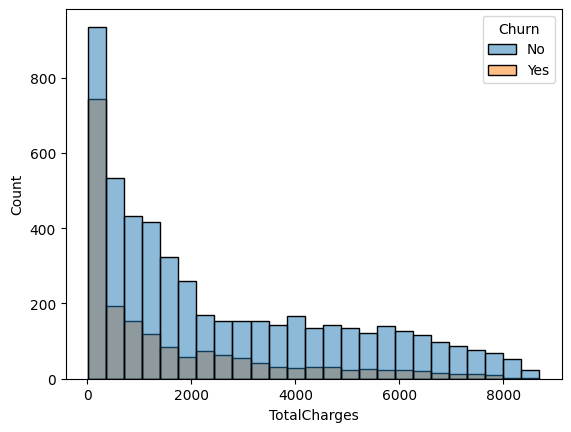

In [ ]:
#13.	hist / distplot по MonthlyCharges, tenure, TotalCharges.
sns.histplot(x='TotalCharges', hue='Churn', data=df)

<Axes: xlabel='MonthlyCharges', ylabel='Count'>

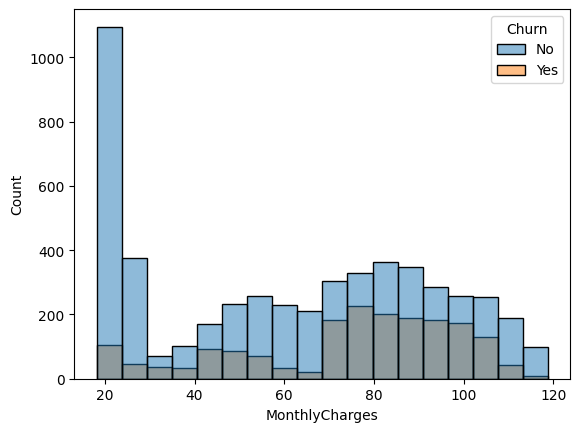

In [ ]:
sns.histplot(x='MonthlyCharges', hue='Churn', data=df)

<Axes: xlabel='Count', ylabel='tenure'>

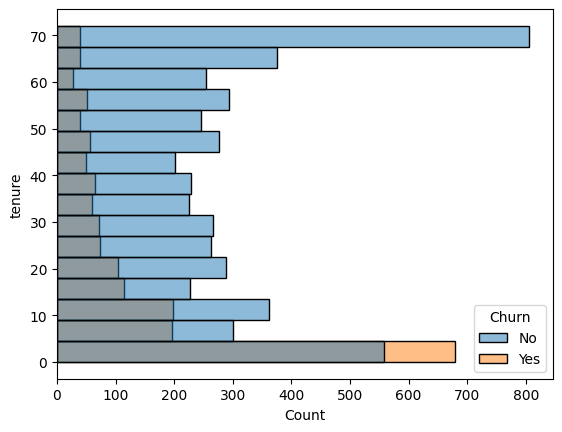

In [ ]:
sns.histplot(y='tenure', hue='Churn', data=df)

<Axes: ylabel='MonthlyCharges'>

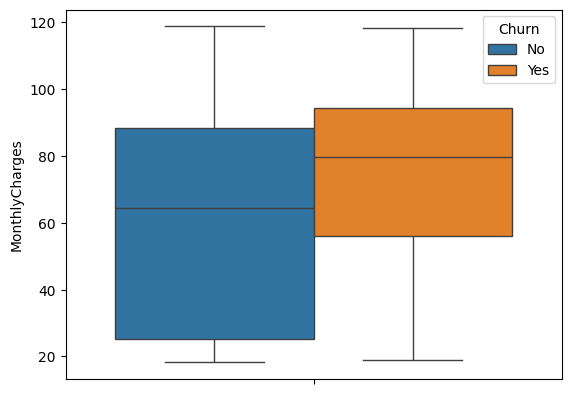

In [ ]:
#14.	boxplot: Churn vs MonthlyCharges.
sns.boxplot( y='MonthlyCharges', hue='Churn' ,data=df)

<Axes: xlabel='Contract'>

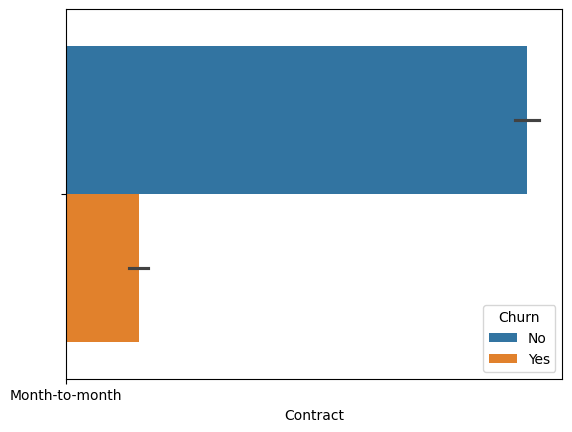

In [ ]:
#15.	barplot: Churn vs Contract.
sns.barplot(x='Contract', hue='Churn', data=df)

<Axes: >

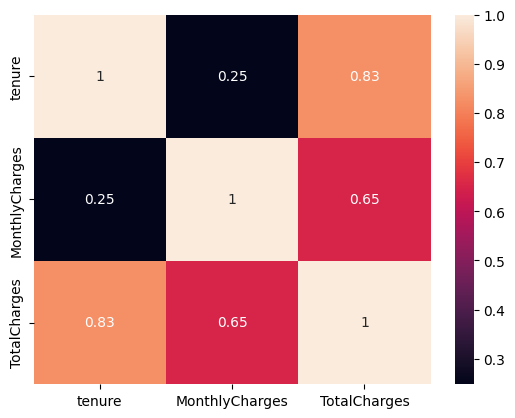

In [ ]:
#16.	heatmap корреляций числовых признаков.
num = df.select_dtypes(include=['int64', 'float64'])
sns.heatmap(num.corr(), annot=True)

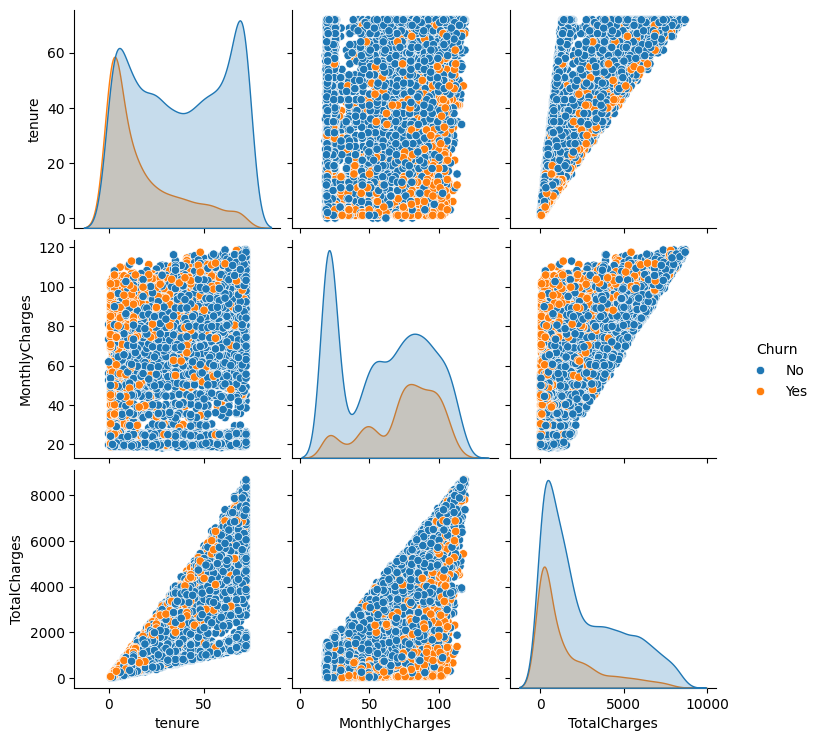

In [ ]:
#17.	pairplot по числовым признакам + Churn.
sns.pairplot(df, hue='Churn')

# ЭТАП 2: Предобработка

In [ ]:
#18.	Проверить пропущенные значения и заполнить/удалить.
df.isnull().sum()

,0
tenure,0
MonthlyCharges,0
TotalCharges,11
Contract,0
InternetService,0
OnlineSecurity,0
TechSupport,0
Churn,0


In [ ]:
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

In [ ]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

In [ ]:
#19.	Кодировка категориальных признаков (Contract, InternetService, OnlineSecurity, TechSupport, Churn) с помощью:
new_df = pd.get_dummies(df, columns=['Contract', 'InternetService', 'OnlineSecurity', 'TechSupport']).astype(int)

In [ ]:
new_df.head()

,tenure,MonthlyCharges,TotalCharges,Churn,Contract_Month-to-month,Contract_One year,Contract_Two year,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes
0,1,29,29,0,1,0,0,1,0,0,1,0,0,1,0,0
1,34,56,1889,0,0,1,0,1,0,0,0,0,1,1,0,0
2,2,53,108,1,1,0,0,1,0,0,0,0,1,1,0,0
3,45,42,1840,0,0,1,0,1,0,0,0,0,1,0,0,1
4,2,70,151,1,1,0,0,0,1,0,1,0,0,1,0,0


In [ ]:
#20.	Масштабирование числовых признаков (StandardScaler).
scaler = StandardScaler()
fetures = new_df.drop(columns=['Churn'])
scaler_data = scaler.fit_transform(fetures)


In [ ]:
#21.	Разделить данные на X и y (где y = Churn).
x = scaler_data
y = new_df['Churn']

In [ ]:
#22.	Разделить выборку на train/test (80/20).
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# ЭТАП 3: Обучение моделей

In [ ]:
model_lg = LogisticRegression()
knn_model = KNeighborsClassifier()
svm_model = SVC()
forest_model = RandomForestClassifier()
tree_model = DecisionTreeClassifier(criterion = 'gini', max_depth = 5, min_samples_leaf = 1, min_samples_split = 2)
# criterion = 'gini', max_depth = 10, min_samples_leaf = 2, min_samples_split = 10)
# 'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}

In [ ]:
model_lg.fit(x_train, y_train)

LogisticRegression()

In [ ]:

tree_model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [ ]:

forest_model.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:

svm_model.fit(x_train, y_train)

SVC()

In [ ]:

knn_model.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred_lg = model_lg.predict(x_test)
y_pred_tree = tree_model.predict(x_test)
y_pred_forest = forest_model.predict(x_test)
y_pred_svm = svm_model.predict(x_test)
y_pred_knn = knn_model.predict(x_test)

In [ ]:
print('Accuracy score')
print(f'Log model: {accuracy_score(y_test, y_pred_lg)}')
print(f'Tree model: {accuracy_score(y_test, y_pred_tree)}')
print(f'Forest model: {accuracy_score(y_test, y_pred_forest)}')
print(f'SVM model: {accuracy_score(y_test, y_pred_svm)}')
print(f'KNN model: {accuracy_score(y_test, y_pred_knn)}')

Accuracy score
Log model: 0.8062455642299503
Tree model: 0.7970191625266146
Forest model: 0.7771469127040455
SVM model: 0.8048261178140526
KNN model: 0.7799858055358411


In [ ]:
print('Precision score')
print(f'Log model: {precision_score(y_test, y_pred_lg)}')
print(f'Tree model: {precision_score(y_test, y_pred_tree)}')
print(f'Forest model: {precision_score(y_test, y_pred_forest)}')
print(f'SVM model: {precision_score(y_test, y_pred_svm)}')
print(f'KNN model: {precision_score(y_test, y_pred_knn)}')

Precision score
Log model: 0.6612903225806451
Tree model: 0.6445182724252492
Forest model: 0.5993265993265994
SVM model: 0.696
KNN model: 0.6082474226804123


In [ ]:
print('Recall score')
print(f'Log model: {recall_score(y_test, y_pred_lg)}')
print(f'Tree model: {recall_score(y_test, y_pred_tree)}')
print(f'Forest model: {recall_score(y_test, y_pred_forest)}')
print(f'SVM model: {recall_score(y_test, y_pred_svm)}')
print(f'KNN model: {recall_score(y_test, y_pred_knn)}')

Recall score
Log model: 0.5495978552278821
Tree model: 0.5201072386058981
Forest model: 0.4772117962466488
SVM model: 0.46648793565683644
KNN model: 0.4745308310991957


In [ ]:
print('F1 score')
print(f'Log model: {f1_score(y_test, y_pred_lg)}')
print(f'Tree model: {f1_score(y_test, y_pred_tree)}')
print(f'Forest model: {f1_score(y_test, y_pred_forest)}')
print(f'SVM model: {f1_score(y_test, y_pred_svm)}')
print(f'KNN model: {f1_score(y_test, y_pred_knn)}')

F1 score
Log model: 0.6002928257686676
Tree model: 0.5756676557863502
Forest model: 0.5313432835820896
SVM model: 0.5585874799357945
KNN model: 0.5331325301204819


In [ ]:
print('All metrics')
print(f'Log model: {classification_report(y_test, y_pred_lg)}')
print(f'Tree model: {classification_report(y_test, y_pred_tree)}')
print(f'Forest model: {classification_report(y_test, y_pred_forest)}')
print(f'SVM model: {classification_report(y_test, y_pred_svm)}')
print(f'KNN model: {classification_report(y_test, y_pred_knn)}')

All metrics
Log model:               precision    recall  f1-score   support

           0       0.85      0.90      0.87      1036
           1       0.66      0.55      0.60       373

    accuracy                           0.81      1409
   macro avg       0.75      0.72      0.74      1409
weighted avg       0.80      0.81      0.80      1409

Tree model:               precision    recall  f1-score   support

           0       0.83      0.82      0.83      1036
           1       0.52      0.53      0.52       373

    accuracy                           0.75      1409
   macro avg       0.67      0.67      0.67      1409
weighted avg       0.75      0.75      0.75      1409

Forest model:               precision    recall  f1-score   support

           0       0.83      0.88      0.85      1036
           1       0.60      0.50      0.54       373

    accuracy                           0.78      1409
   macro avg       0.71      0.69      0.70      1409
weighted avg       0.77  

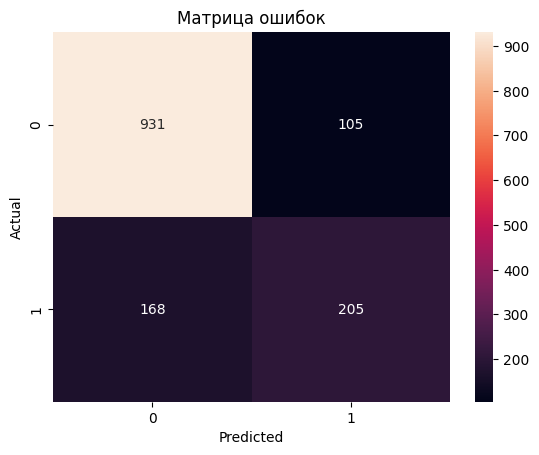

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_lg)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Матрица ошибок')
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion' : ['gini', 'entropy']
}

In [ ]:
dt = DecisionTreeClassifier(random_state=42)


In [ ]:
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid,
                           cv=5, scoring = 'f1' ,n_jobs=-1, verbose=1)

In [ ]:
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='f1', verbose=1)

In [ ]:
print("Лучшие гиперпараметры:", grid_search.best_params_)


Лучшие гиперпараметры: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [ ]:
joblib.dump(model_lg, 'model_lg.pkl')
joblib.dump(svm_model, 'model_svm.pkl')
joblib.dump(tree_model, 'model_tree1.pkl')
joblib.dump(scaler, 'scaler_2.pkl')

['scaler_2.pkl']

In [ ]:
new_df.columns

Index(['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes'],
      dtype='object')

In [ ]:
li = []
for i in new_df.columns:
  subword = 'TechSupport_'
  if subword in i:
    li.append(i[len(subword):])
print(li)


['No', 'No internet service', 'Yes']


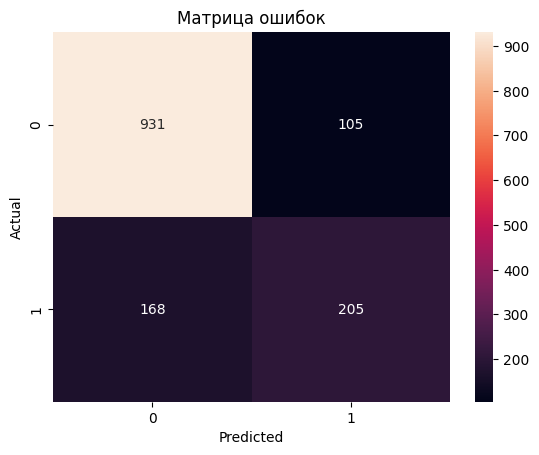

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_lg)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Матрица ошибок')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print('Log model')
print(classification_report(y_test, y_pred_lg))

Log model
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1036
           1       0.66      0.55      0.60       373

    accuracy                           0.81      1409
   macro avg       0.75      0.72      0.74      1409
weighted avg       0.80      0.81      0.80      1409

